# Complexity analysis for visualization

In [1]:
%matplotlib widget
import pychaoson.calculate_chaos as calc_chaos
import pychaoson.pychaoson as pychaoson
import pychaoson.chaotic_systems as chaotic_systems

import pychaoson.pychaoson as pychaoson
import numpy as np
import sympy as sp
from itertools import product
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.display import display

### Compute visualization methods for chaos with the logistic map

In [2]:
input_device = 'ZoomAudio' # change to your needs (For mac: if through Zoom, set to 'ZoomAudio')
output_device = 'ZoomAudio'# change to your needs
pychaos = pychaoson.startup(input_device, output_device, data_path=None, samples_path=None)
logistic_map = chaotic_systems.LogisticMap()
pychaos.start_synth("Logistic Map", "Granular", "PnoHarpStrumMono")
points = 200
box_count_dim, _ = calc_chaos.dimension_analysis(pychaos, logistic_map, [0], points_per_dim=points,
                                 take_num=1000, take_last=True, method='box_count_dim')
box_count_dim_transient, _ = calc_chaos.dimension_analysis(pychaos, logistic_map, [0], points_per_dim=points,
                                 take_num=1000, take_last=False, method='box_count_dim')
layapunov_exp, _ = calc_chaos.dimension_analysis(pychaos, logistic_map, [0], points_per_dim=points,
                                 take_num=1000, take_last=True, method='lyapunov_exponent')
layapunov_exp_transient, _ = calc_chaos.dimension_analysis(pychaos, logistic_map, [0], points_per_dim=points,
                                 take_num=1000, take_last=False, method='lyapunov_exponent')
sample_entropy, time_series_array = calc_chaos.dimension_analysis(pychaos, logistic_map, [0], points_per_dim=points,
                                 take_num=500, take_last=True,method='sample_entropy')
sample_entropy_transient, time_series_array_transient = calc_chaos.dimension_analysis(pychaos, logistic_map, [0], points_per_dim=points,
                                 take_num=500, take_last=False, method='sample_entropy')

<IPython.core.display.Javascript object>

Found old process. Please exit sc3nb via sc.exit(). 
 Terminating psutil.Process(pid=5604, name='sclang', status='running', started='14:24:24') because none of the parents=[psutil.Process(pid=592, name='SuperCollider', status='running', started='2023-10-12 03:39:53'), psutil.Process(pid=1, name='launchd', status='running', started='2023-10-12 03:36:17'), psutil.Process(pid=0, name='kernel_task', status='running', started='2023-10-12 03:36:17')] are in allowed_parents=('scide', 'python', 'tox') More information can be found in the documentation.


Starting sclang process... [sclang | start reading ]
Done.
Registering OSC /return callback in sclang... Done.
Loading default sc3nb SynthDefs... Done.
Booting SuperCollider Server... [scsynth | start reading ]
Done.


Compute time series:: 1it [00:00,  6.58it/s]
Compute box dim: 100%|███████████████████████████| 2/2 [00:00<00:00, 416.23it/s]
Compute time series:: 1it [00:00,  6.62it/s]
Compute box dim: 100%|███████████████████████████| 2/2 [00:00<00:00, 423.03it/s]
Compute time series:: 1it [00:00,  6.41it/s]
Compute lyapunov: 100%|██████████████████████████| 2/2 [00:00<00:00, 289.48it/s]
Compute time series:: 1it [00:00,  6.38it/s]
Compute lyapunov: 100%|██████████████████████████| 2/2 [00:00<00:00, 287.19it/s]
Compute time series:: 1it [00:00,  6.43it/s]
Compute sample entropy: 100%|█████████████████████| 2/2 [00:02<00:00,  1.40s/it]
Compute time series:: 1it [00:00,  6.49it/s]
Compute sample entropy: 100%|█████████████████████| 2/2 [00:02<00:00,  1.47s/it]


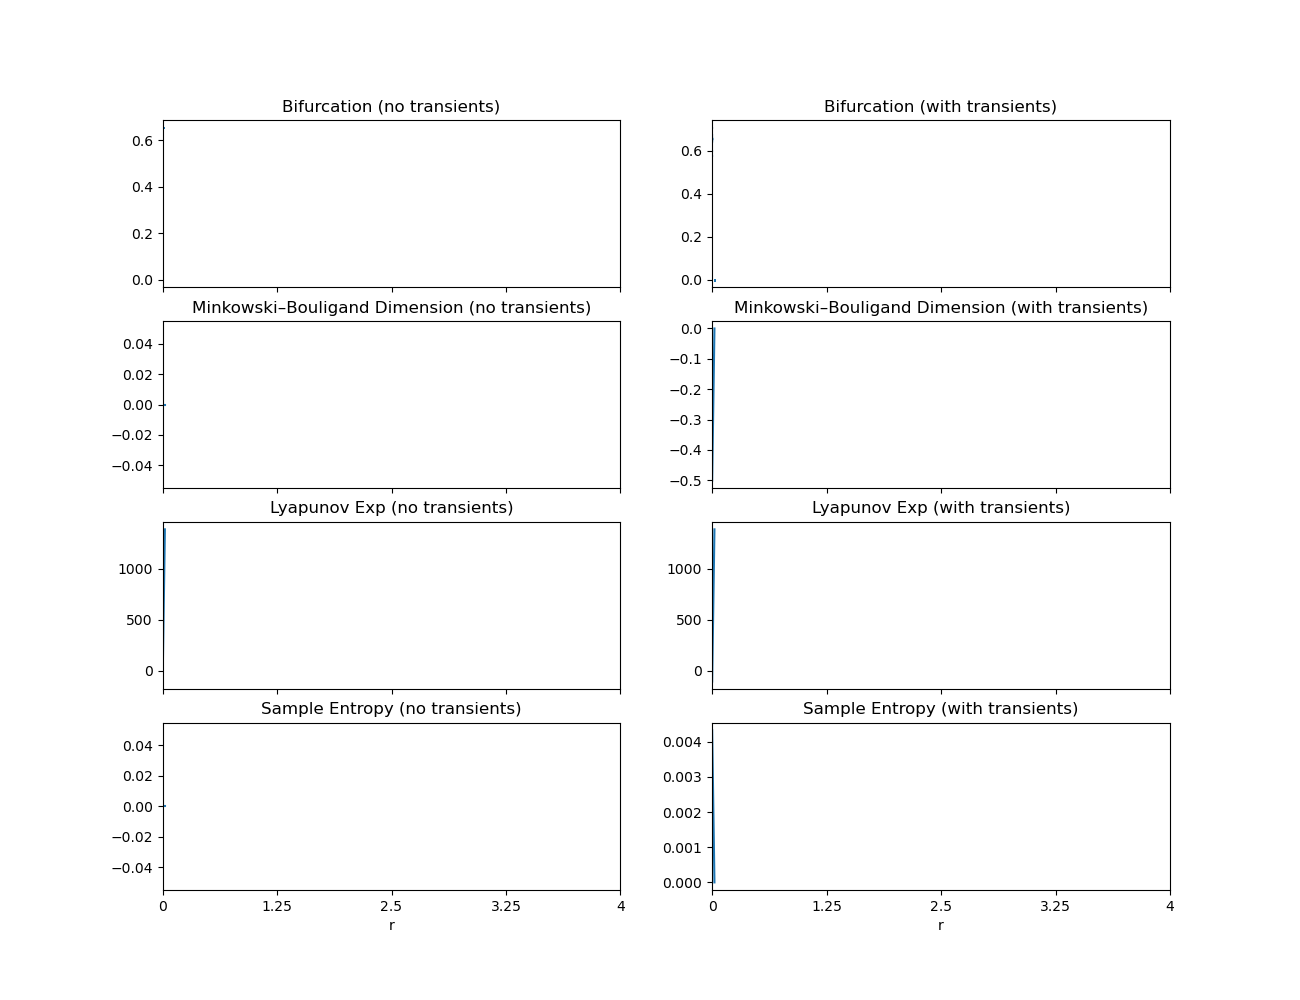

In [3]:
linspace = np.linspace(logistic_map.get_param_space()[0][1], logistic_map.get_param_space()[0][2],points)
fig, axs = plt.subplots(4, 2, figsize=(13, 10), sharex=True)

y_scatter = []
x_scatter = []
for i in range(len(linspace)):
    r = linspace[i]
    for point in time_series_array[i][:200]:
        x_scatter.append(i)
        y_scatter.append(point)
axs[0,0].scatter(x_scatter, y_scatter, ls='', marker=',',s=0.07)
axs[0,0].set_title('Bifurcation (no transients)')
y_scatter = []
x_scatter = []
for i in range(len(linspace)):
    r = linspace[i]
    for point in time_series_array_transient[i][:200]:
        x_scatter.append(i)
        y_scatter.append(point)
axs[0,1].scatter(x_scatter, y_scatter, ls='', marker=',',s=0.07)
axs[0,1].set_title('Bifurcation (with transients)')
axs[1,0].plot(box_count_dim)
axs[1,0].set_title('Minkowski–Bouligand Dimension (no transients)')
axs[1,1].plot(box_count_dim_transient)
axs[1,1].set_title('Minkowski–Bouligand Dimension (with transients)')
axs[2,0].plot(layapunov_exp)
axs[2,0].set_title('Lyapunov Exp (no transients)')
axs[2,1].plot(layapunov_exp_transient)
axs[2,1].set_title('Lyapunov Exp (with transients)')
axs[3,0].plot(sample_entropy)
axs[3,0].set_title('Sample Entropy (no transients)')
axs[3,0].set_xticks([0,50,100,150, 200], ['0','1.25','2.5','3.25','4'])
axs[3,0].set_xlabel('r')
axs[3,1].plot(sample_entropy_transient)
axs[3,1].set_title('Sample Entropy (with transients)')
axs[3,1].set_xticks([0,50,100,150, 200], ['0','1.25','2.5','3.25','4'])
axs[3,1].set_xlabel('r')
plt.show()

In [ ]:
pychaos.stop()